Lipieza codigo

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier




In [98]:
df_e1 = pd.read_csv('covtype.data', header=None)
df_e1


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [99]:
columnas = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways ', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
columnas = columnas + ['Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4']
columnas += ['Soil_Type_' + str(i) for i in range(1, 41)]
columnas += ['Cover_Type']
df_e1.columns = columnas
df_e1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [100]:
# crea la columna 'Soil_Type' sumando las columnas relacionadas a los tipos de suelo
df_e1['SOIL_TYPE'] = df_e1[[col for col in df_e1.columns if col.startswith('Soil_Type')]].sum(axis=1)

# crea la columna 'Wilderness_Area' sumando las columnas relacionadas a las áreas silvestres
df_e1['WILDERNESS_AREA'] = df_e1[[col for col in df_e1.columns if col.startswith('Wilderness_Area')]].sum(axis=1)

# elimina las columnas de Soil
df_e1 = df_e1.drop(columns=[col for col in df_e1.columns if col.startswith('Soil_Type')])

# elimina las  columnas de Wilderness
df_e1 = df_e1.drop(columns=[col for col in df_e1.columns if col.startswith('Wilderness_Area')])


df_e1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,SOIL_TYPE,WILDERNESS_AREA
0,2596,51,3,258,0,510,221,232,148,6279,5,1,1
1,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
2,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
3,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
4,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3,1,1
581008,2391,152,19,67,12,95,240,237,119,845,3,1,1
581009,2386,159,17,60,7,90,236,241,130,854,3,1,1
581010,2384,170,15,60,5,90,230,245,143,864,3,1,1


# Ejercicio 1

In [101]:

# Separar la variable objetivo del resto de variables
X = df_e1.drop('Cover_Type', axis=1)
y = df_e1['Cover_Type']

# Crear un modelo de árbol de decisión
d_arbol = DecisionTreeClassifier(random_state=100)

# Ajustar el modelo a los datos
d_arbol.fit(X, y)

# Obtener las importancias de cada variable
importancias = d_arbol.feature_importances_

# Crear una lista con las variables ordenadas por importancia
variables = X.columns.tolist()
variables_imp = list(zip(variables, importances))
variables_imp.sort(key=lambda x: x[1], reverse=True)

# Filtrar el DataFrame para quedarnos solamente con las variables necesarias
total_imp = 0
selected_variables = []
for variable, importance in variables_imp:
    total_imp += importance
    selected_variables.append(variable)
    if total_imp >= 0.95:
        break

df_reducida = df_e1[selected_variables + ['Cover_Type']]
df_reducida


,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,2596,510,6279,258,0,232,51,221,148,5
1,2590,390,6225,212,-6,235,56,220,151,5
2,2804,3180,6121,268,65,238,139,234,135,2
3,2785,3090,6211,242,118,238,155,238,122,2
4,2595,391,6172,153,-1,234,45,220,150,5
...,...,...,...,...,...,...,...,...,...,...
581007,2396,108,837,85,17,237,153,240,118,3
581008,2391,95,845,67,12,237,152,240,119,3
581009,2386,90,854,60,7,241,159,236,130,3
581010,2384,90,864,60,5,245,170,230,143,3


# Ejercicio 2
Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

* 2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

* 2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

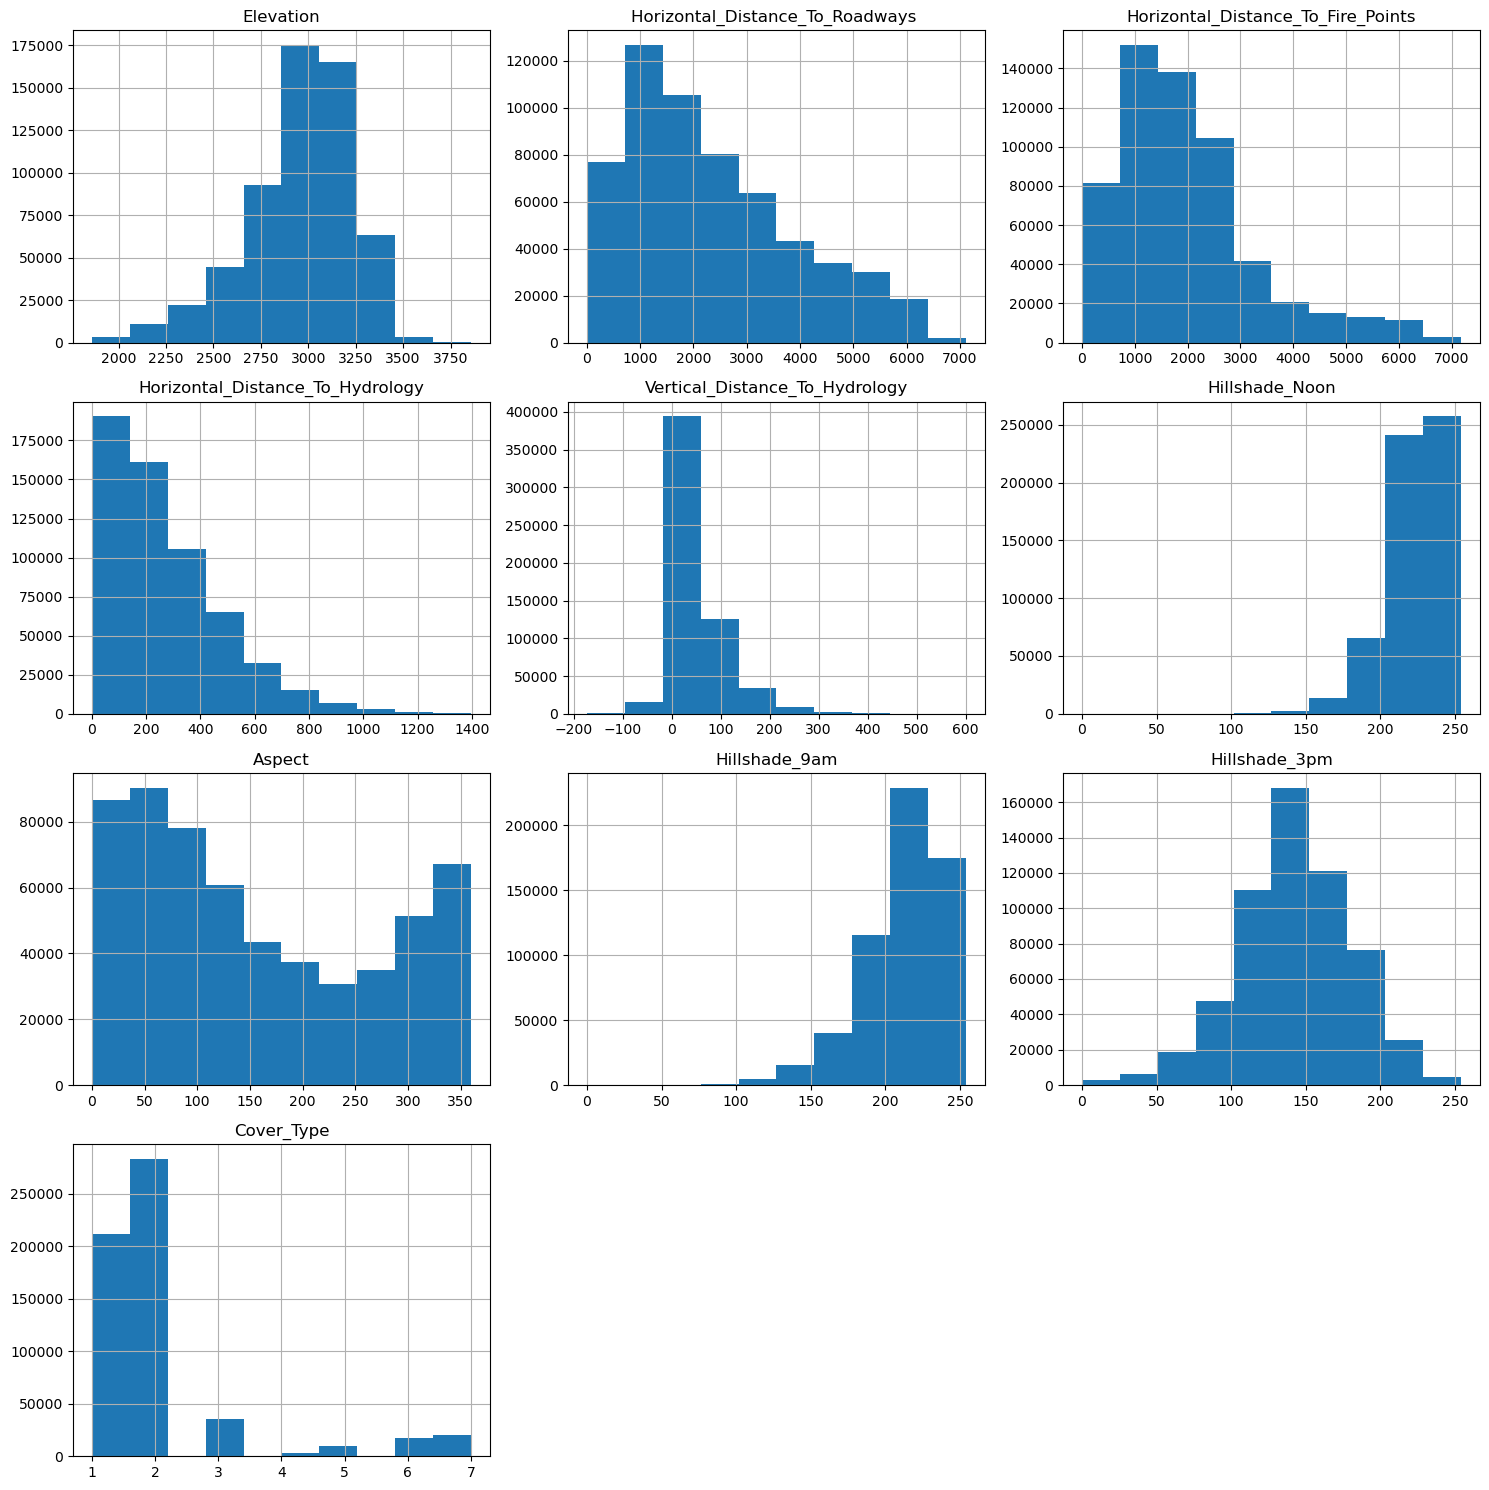

In [102]:
#histogramas
df_reducida.hist(figsize=(15, 15))
plt.tight_layout() #para que los graficos no se pongan uno encima de otro
plt.show()

In [103]:
# normalizar todas las variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# comenzaremos con las variables de entrada entre los valores 0 y 1
df_reducida_norm = pd.DataFrame(scaler.fit_transform(df_reducida.drop('Cover_Type', axis=1)), columns=df_reducida.drop('Cover_Type', axis=1).columns)
# la variable objetivo no la normalizamos
df_reducida_norm['Cover_Type'] = df_reducida['Cover_Type']
df_reducida_norm

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.913386,0.141667,0.870079,0.582677,5
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.155556,0.866142,0.594488,5
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.386111,0.921260,0.531496,2
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.430556,0.937008,0.480315,2
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.125000,0.866142,0.590551,5
...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.933071,0.425000,0.944882,0.464567,3
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.933071,0.422222,0.944882,0.468504,3
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.948819,0.441667,0.929134,0.511811,3
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.964567,0.472222,0.905512,0.562992,3


In [104]:
#ahora normalizaremos la variable objetivo en valores numéricos entre 0 y el número de clases menos 1
df_reducida_norm['Cover_Type'] = df_reducida_norm['Cover_Type'] - 1
df_reducida_norm

,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Hillshade_Noon,Aspect,Hillshade_9am,Hillshade_3pm,Cover_Type
0,0.368684,0.071659,0.875366,0.184681,0.223514,0.913386,0.141667,0.870079,0.582677,4
1,0.365683,0.054798,0.867838,0.151754,0.215762,0.925197,0.155556,0.866142,0.594488,4
2,0.472736,0.446817,0.853339,0.191840,0.307494,0.937008,0.386111,0.921260,0.531496,1
3,0.463232,0.434172,0.865886,0.173228,0.375969,0.937008,0.430556,0.937008,0.480315,1
4,0.368184,0.054939,0.860449,0.109520,0.222222,0.921260,0.125000,0.866142,0.590551,4
...,...,...,...,...,...,...,...,...,...,...
581007,0.268634,0.015175,0.116688,0.060845,0.245478,0.933071,0.425000,0.944882,0.464567,2
581008,0.266133,0.013348,0.117803,0.047960,0.239018,0.933071,0.422222,0.944882,0.468504,2
581009,0.263632,0.012646,0.119058,0.042949,0.232558,0.948819,0.441667,0.929134,0.511811,2
581010,0.262631,0.012646,0.120452,0.042949,0.229974,0.964567,0.472222,0.905512,0.562992,2


# Ejercicio 3
Después de estandarizar los datos procedemos a crear el primer clasificador
A Divide el datset en training y en test:
- Guarda el 20% de los datos para testeo.
- random_state=100
B Entrena un modelo de regresión logística:
- Número máximo de iteraciones igual a 1000
- random_state=100
C Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
-  Accuracy
- F1-score (average='weighted')
- Classification report (zero_division=0)
- Confusion matrix

A) Divide el datset en training y en test:
- Guarda el 20% de los datos para testeo.
- random_state=100
- Dividir el dataset en Training y Test set


In [107]:
#comenzamos a crear el train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
